<a href="https://colab.research.google.com/github/tauqeer7328/Customer-Churn-Prediction-in-E-Commerce/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,recall_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data from the excel file
description = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [6]:
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


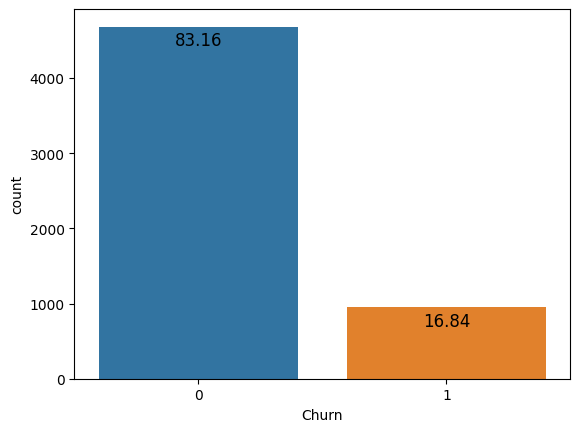

In [7]:
#count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=data)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.

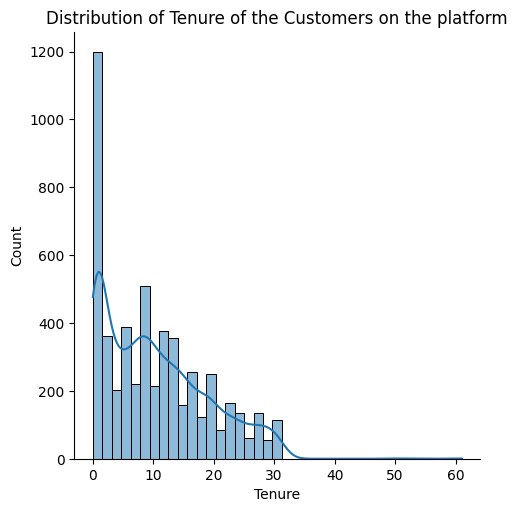

In [8]:
#Distribution of the Tenure of the customers on the platform

sns.displot(x='Tenure', kde=True, data=data)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()



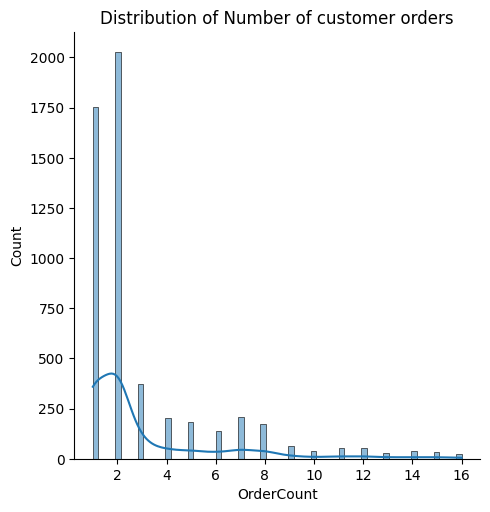

In [9]:
#Distribution of Order Count of customers

sns.displot(x='OrderCount', kde=True, data=data)
plt.title("Distribution of Number of customer orders")
plt.show()



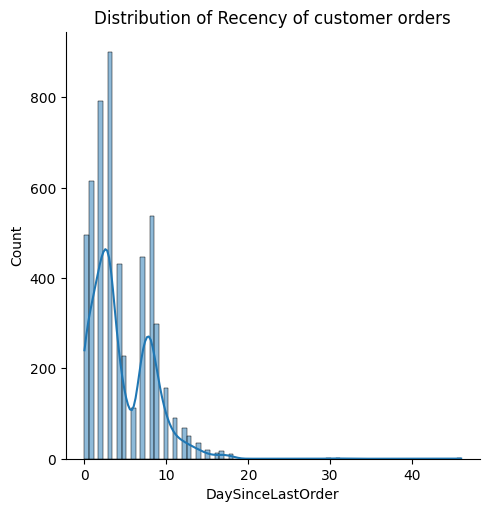

In [10]:
#Distribution of Recency of the customer Recency is gotten from the day since last order of each customer. Customers with low number of days since last order are recent customers and vice versa

sns.displot(x='DaySinceLastOrder', kde=True, data=data)
plt.title("Distribution of Recency of customer orders")
plt.show()



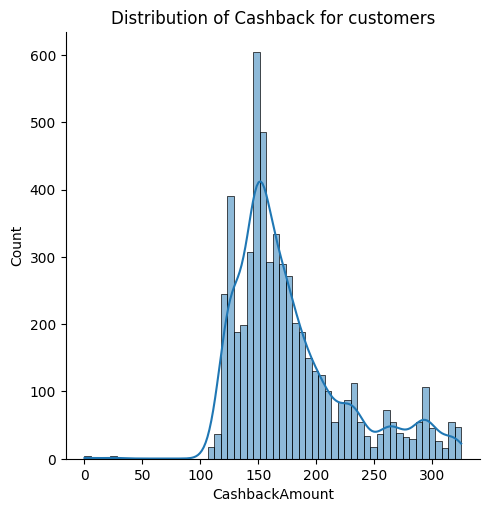

In [11]:
#Distribution of Amount returned for money spent by customers Cashback is a reward that refunds a percentage of the money spent to by a customer to him/her, It is usually dependent on the amount spent, so the cashback column can be used in place of the amount spent columns.

sns.displot(x='CashbackAmount',kde=True, data=data)
plt.title('Distribution of Cashback for customers')
plt.show()



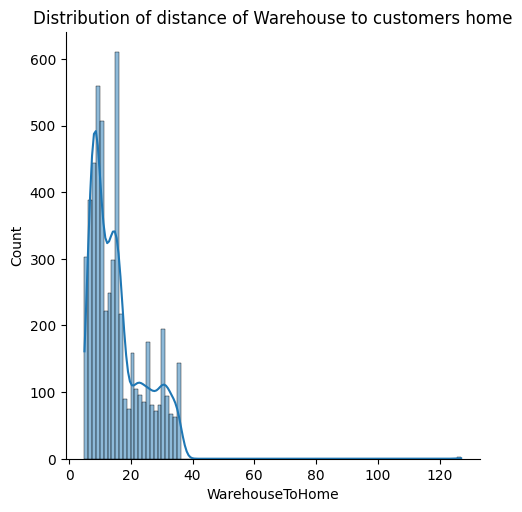

In [12]:
#Distribution of distance of Warehouse to customers home

sns.displot(x='WarehouseToHome', kde=True, data=data)
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()



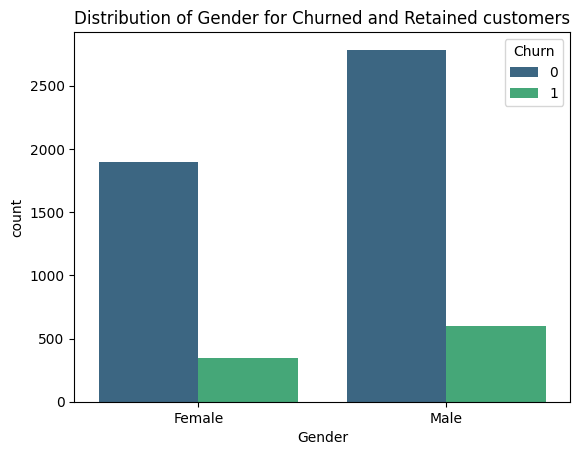

In [13]:
#Distribution of Gender for Churned and Retained customers
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

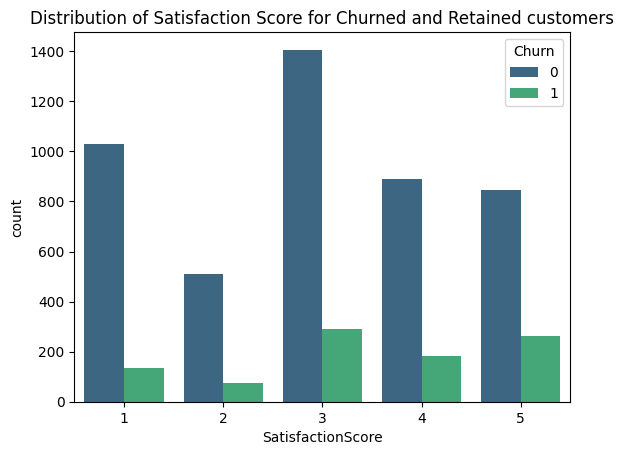

In [14]:
#Distribution of Satisfaction Score for Churned and Retained customers
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

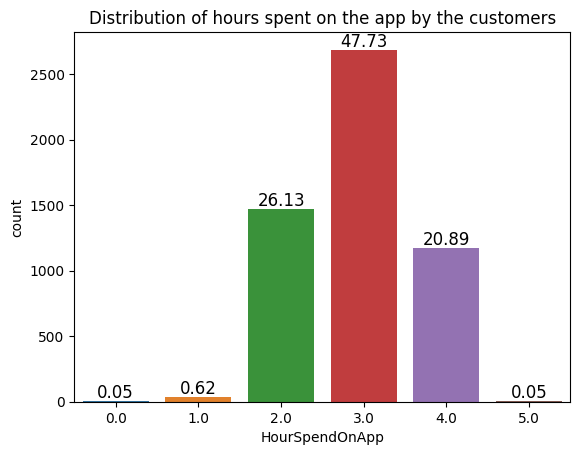

In [15]:
#Distribution of hours spent on the app by the customers
axx = sns.countplot(x='HourSpendOnApp', data=data)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

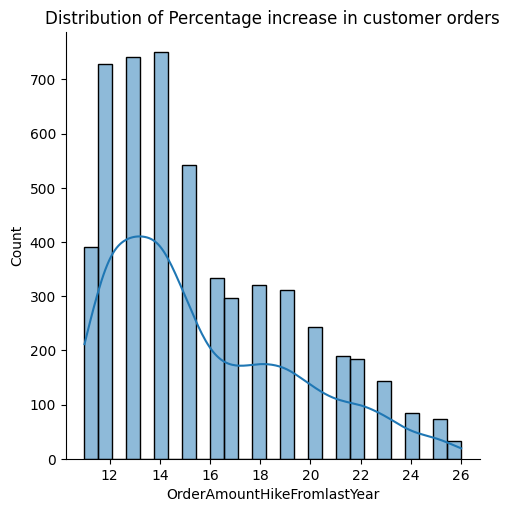

In [16]:
#Distribution of Percentage increase in customer orders
sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=data)
plt.title("Distribution of Percentage increase in customer orders")
plt.show()


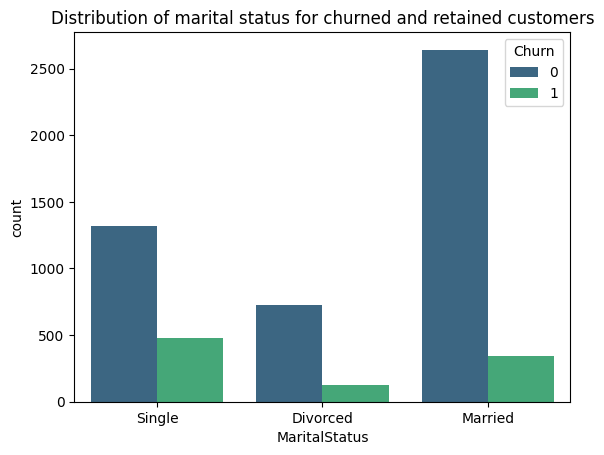

In [17]:
#Distribution of marital status for churned and retained customers
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()

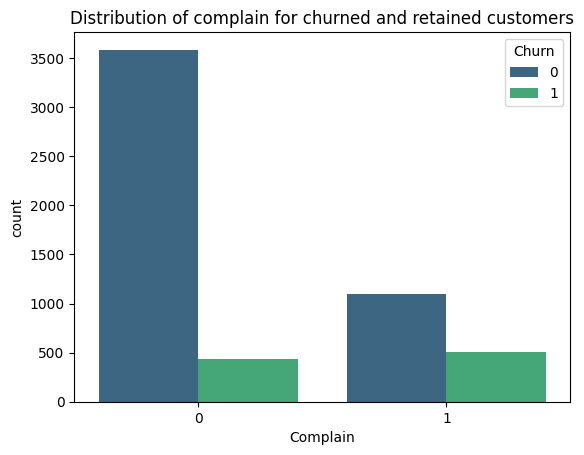

In [18]:
#Distribution of complain for churned and retained customers
sns.countplot(x='Complain', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

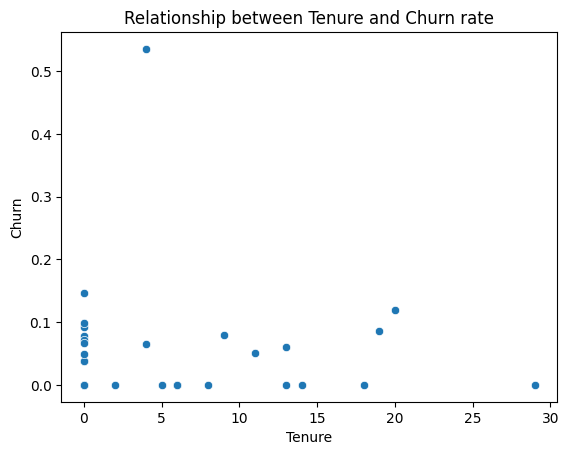

In [19]:
#Relationship between the Tenure and Churn rate
sns.scatterplot(x=data['Tenure'],y=data.groupby('Tenure').Churn.mean())
plt.title("Relationship between Tenure and Churn rate")
plt.show()



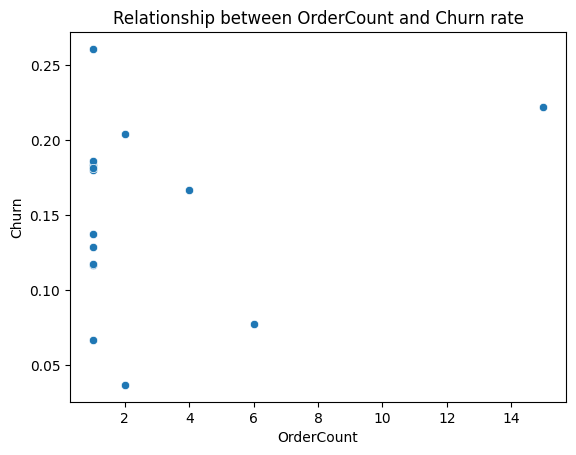

In [20]:
#Relationship between the Order Count and Churn rate

sns.scatterplot(x=data['OrderCount'],y=data.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

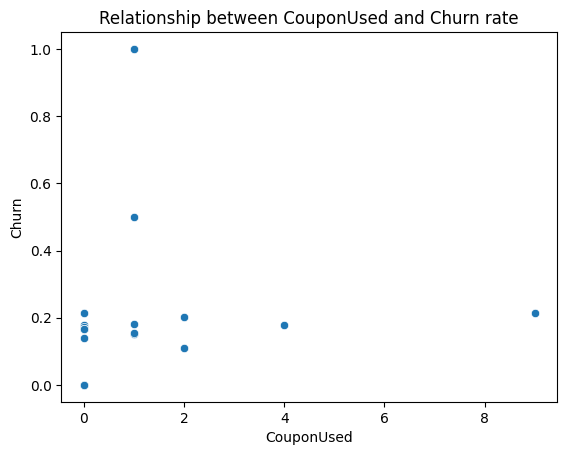

In [21]:
#Relationship between the Coupon Used and Churn rate

sns.scatterplot(x=data['CouponUsed'],y=data.groupby('CouponUsed').Churn.mean())
plt.title("Relationship between CouponUsed and Churn rate")
plt.show()

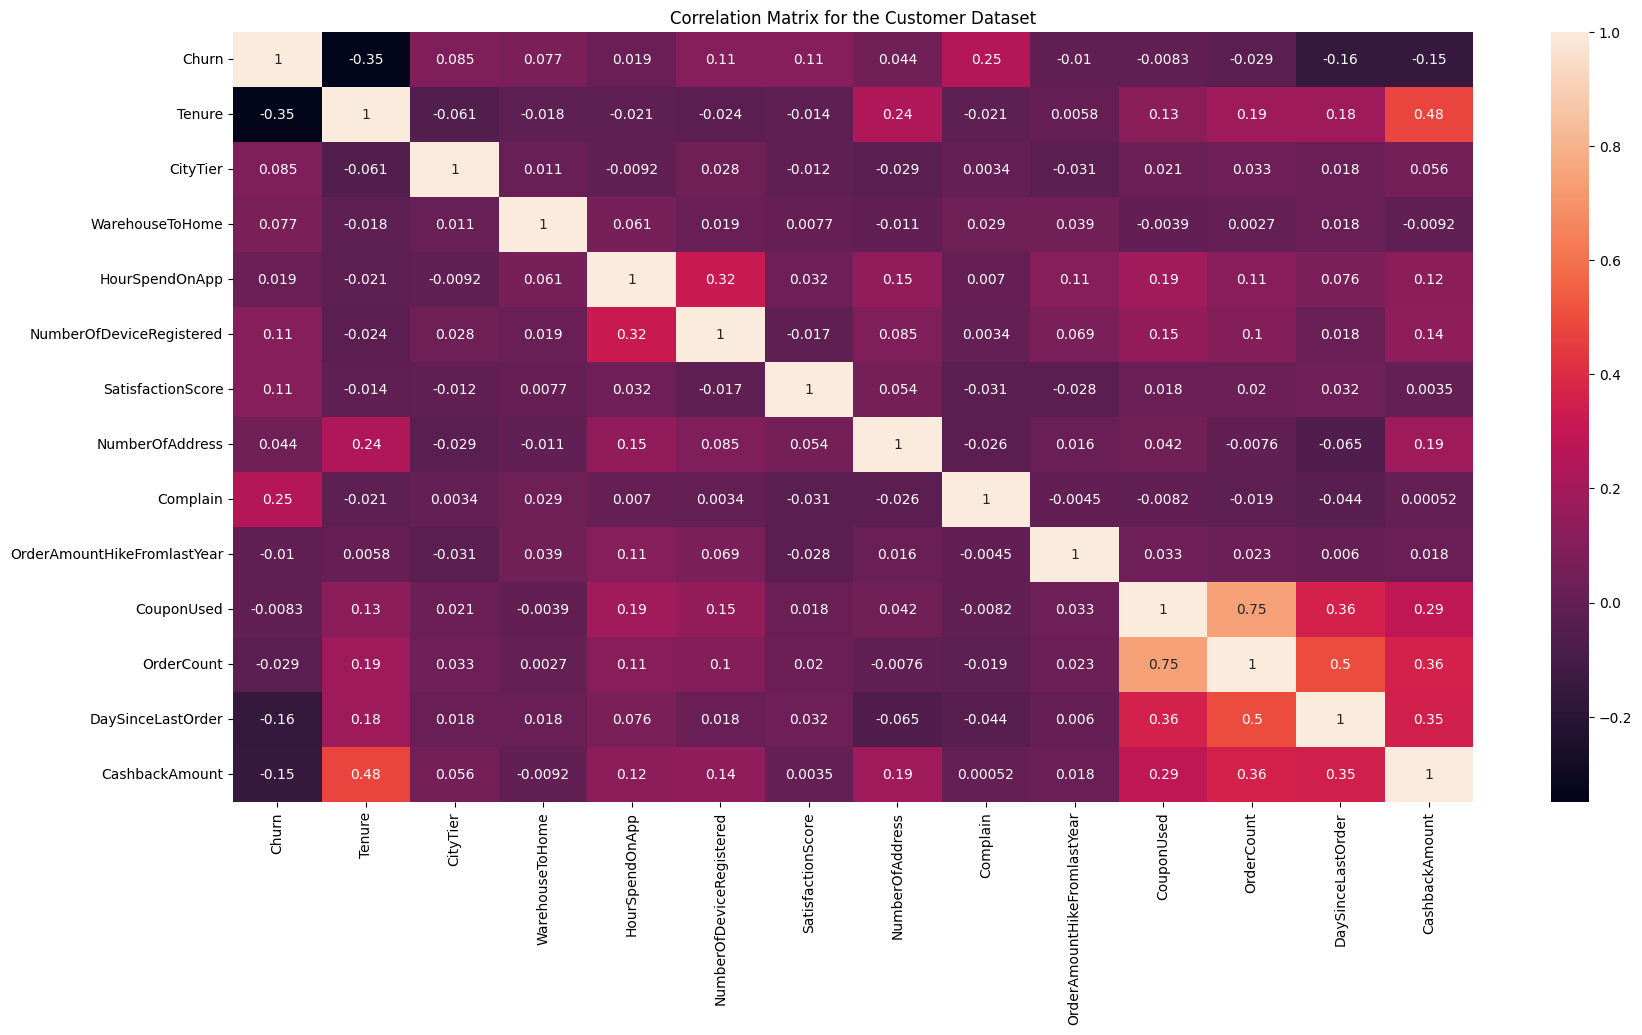

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop('CustomerID',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()


Findings

From the Analysis;

    1.The Tenure, Days since last order, cashback amount, and warehouse to home features have outliers, but the outliers don't have huge impact on tree models, which will be my final model so I will keep them.
    2.Most of the customers spend 3 hours on the app, and 94.75% of the customers spend between 2 and 4 hours on the app
    3.Single people have higher churn rate than other Marital Status
    Customers with complain have higher churn rate than customers without complain
    4.From the scatterplot there is a relationship between tenure and the churn rate as there is a churn rate of 0.5 between 4 and 5 Tenure



In [23]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [24]:
#count the total number of missing values in the dataset
print(f'The number of missing values: {data.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856




In total there are 1856 missing values, and there are also 1856 rows with missing values, meaning that each of the missing value is on a different row, and no row has more than one missing value.

So if we drop all the rows with missing values we would be dropping 1856 rows that is 32.97 percent of the dataset and will cause a data loss


In [25]:
data.duplicated().sum()

0

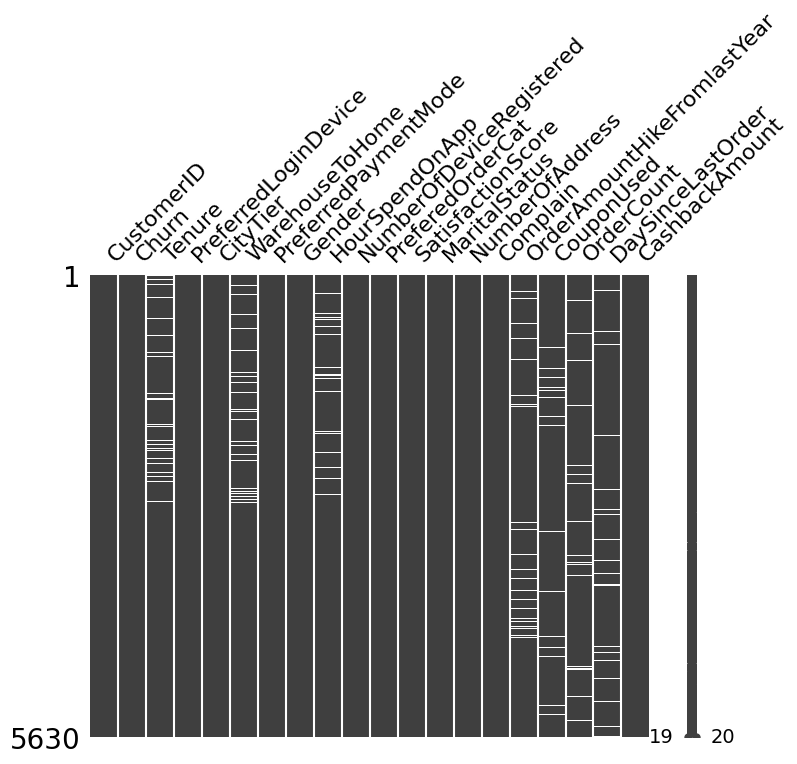

In [26]:
msno.matrix(data, figsize=(8,6))
plt.show()

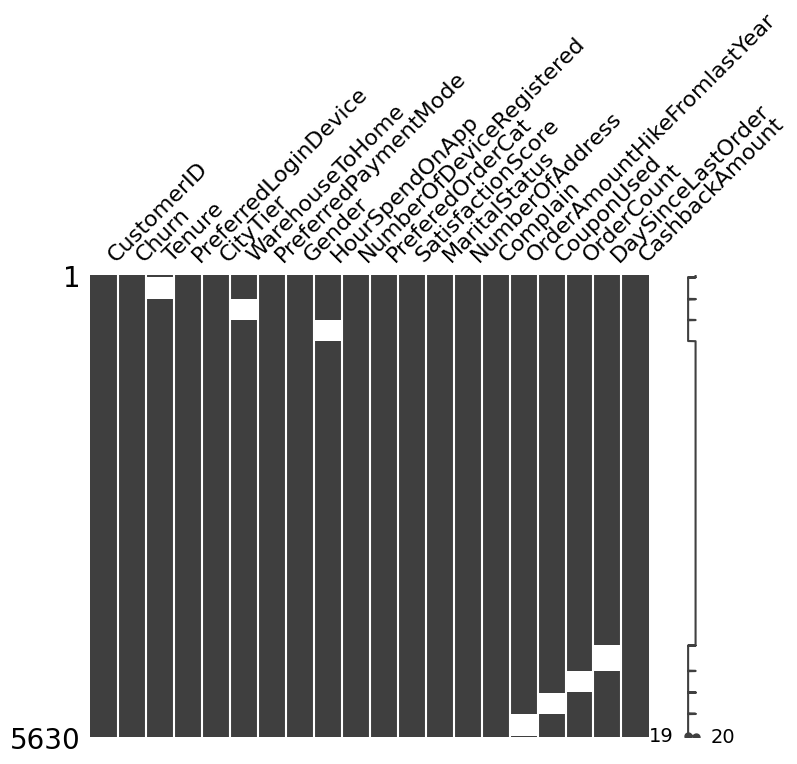

In [27]:
msno.matrix(data.sort_values(by='CashbackAmount'), figsize=(8,6))
plt.show()

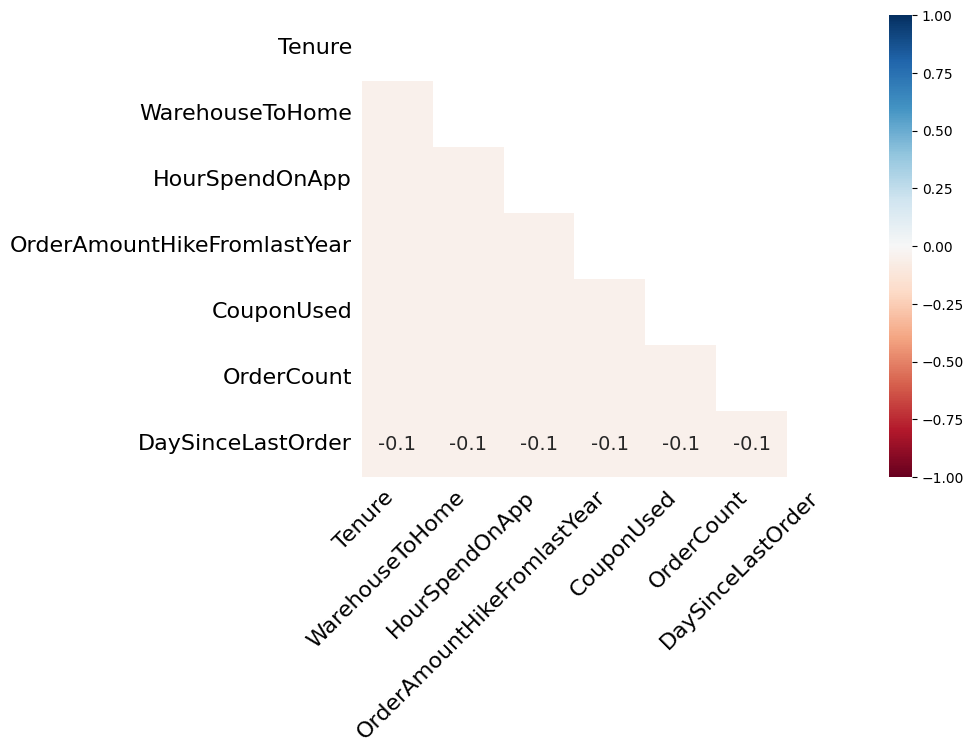

In [28]:
msno.heatmap(data,figsize=(8,6))
plt.show()

In [29]:
cat_data = data.select_dtypes(include='object')
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [30]:
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([data.drop(cat_data.columns, axis=1), encoded], axis=1)

Model Development

    Firstly I will split the data into training and testing samples.
    I will make pipelines which will include all the preprocessing steps and the classifier.
    I will perform cross validation on the training samples, and use prediction of the testing sample to compare the models, and select the best model for hyperparameter tuning.


In [31]:
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

**Logistic Regression**

In [32]:
#Build logistic regression pipeline
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6297707049017716


In [33]:
log_pipe.named_steps

{'imputer': IterativeImputer(random_state=0),
 'scaler': StandardScaler(),
 'logreg': LogisticRegression()}

In [34]:
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', IterativeImputer(random_state=0)),
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())])

Test score for Logistic Regression: 0.652818991097923
Training score for Logistic Regression: 0.6569230769230768


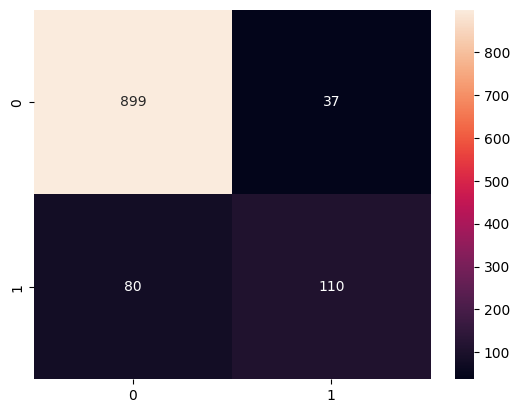

In [35]:
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

In [36]:
accuracy_score(y_test, log_pipe.predict(X_test))

0.8960923623445826

In [37]:
f1_score(y_test, log_pipe.predict(X_test), average="weighted")


0.8906298271155453

In [38]:
recall_score(y_test, log_pipe.predict(X_test), average="weighted")

0.8960923623445826